HOMEWORK 2: COALESCENT WITH MUTATION 
GOLOVKIN M.A.

In [1]:
# Используемые библиотеки
import numpy as np
import pylab
import matplotlib.pyplot as plt
plt.rc('font', family='Verdana')
import copy
%matplotlib inline

Общие функции, используемые для реализации алгоритмов.

In [2]:
# Функция расчета размера популяции в момент времени t
# Входные параметры: время t, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: размер популяции
def Pop_size(t, c, f):
    if len(c) != 1:
        for i in range(1, len(c)):
            if t >= c[i-1] and t < c[i]:
                return f[i-1]
        if t >= c[-1]:
            return f[-1]
    else:
        return(f[0])
    
# Функция проверки изменения размера популяции
# Входные параметры: время t0, время t1, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: было ли изменениие размера, начальное положение
def True_pop(t0, t1, c, f):
    tr0 = len(c) - 1
    tr1 = len(c) - 1    
    for i in range(len(c) - 1):
        if t0 >= c[i] and t0 < c[i+1]:
            tr0 = i
            break;
    for i in range(len(c) - 1):
        if t1 >= c[i] and t1 < c[i+1]:
            tr1 = i
            break;
    if tr0 == tr1:
        return True, int(tr0)
    else:
        return False, int(tr0)

# Функция моделирования времени следующего события и типа события
# Входные параметры: время t0, число индивидуумов K, частота мутации m, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: время следующего события и тип события (0 - коалесценция, 1 - мутация)
def Init(t0, K, m, c, f):
    v = Pop_size(t0, c, f)
    l = K*m + K*(K-1)/(2*v)
    t1 = t0 + np.random.exponential(1/l)
    while True_pop(t0, t1, c, f)[0] == False:
        t0 = c[True_pop(t0, t1, c, f)[1] + 1]
        v = Pop_size(t0, c, f)
        l = K*m + K*(K-1)/(2*v)
        t1 = t0 + np.random.exponential(1/l)
    s = np.random.binomial(1, K*m/l)
    return t1, s

# Функция изображения дерева
# Входные параметры: число индивидуумов K, частота мутации m, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: дерево, число мутаций, распределение мутаций по индивидуумам
def MS_model(K, m, c, f):
    fig, ax = plt.subplots()
    t = 0
    nm = 0
    mut = [[] for i in range(K)]
    par1 = []
    x_plot = []
    y_plot = []
    x = np.zeros(K)
    for i in range(K):
        x[i] = np.sum(np.arange(K)[:i+1])
    x_plot.append(x/np.sum(np.arange(K)))
    y_plot.append(np.zeros(K))
    j1, j2 = 0, 0
    while K!=1:
        t, s = Init(t, K, m, c, f)
        if s == 1:
            j = int(np.random.randint(0,K))
            u = np.random.random()
            mut[j].append(u)
            if len(par1)!=0:
                for i in par1[j]:
                    if i != j:
                        mut[i].append(u)
            ax.scatter(x_plot[-1][j], t, color = 'r')
            nm += 1
        else:
            par2 = []
            j1, j2 = np.random.choice(K, 2, replace = False)
            p = (x_plot[-1][j1]+x_plot[-1][j2])/2
            ax.plot([x_plot[-1], x_plot[-1]], [y_plot[-1], np.ones(K)*t], color = 'k')
            ax.plot([x_plot[-1][j1], p], [t, t], color = 'k')
            ax.plot([x_plot[-1][j2], p], [t, t], color = 'k')
            x_plot[-1][j1] = p
            x_plot[-1][j2] = p
            y_plot[-1] = np.ones(K) * t
            j_max = max(j1,j2)
            j_min = min(j1,j2)
            if len(par1) != 0:
                for i in range(K):
                    if i < j_min:
                        par2.append(par1[i])
                    if i == j_min:
                        par2.append(par1[j_min] + par1[j_max])
                    if i > j_min and i < j_max:
                        par2.append(par1[i])
                    if i > j_max:
                        par2.append(par1[i])
                par1 = copy.deepcopy(par2)
            else:
                for i in range(K):
                    if i < j_min:
                        par1.append([i])
                    if i == j_min:
                        par1.append([j_min, j_max])
                    if i > j_min and i < j_max:
                        par1.append([i])
                    if i > j_max:
                        par1.append([i])
            z1 = np.delete(x_plot[-1], j_max)
            z2 = np.delete(y_plot[-1], j_max)
            x_plot = []
            y_plot = []
            x_plot.append(z1)
            y_plot.append(z2)
            K -= 1
    ax.plot([x_plot[-1], x_plot[-1]], [y_plot[-1], [1.3*t]], color = 'k')
    fig.set_figwidth(12)
    fig.set_figheight(2)
    ax.set_xlim(-0.2,1.2)
    ax.set_ylim(0,1.3*t)
    plt.show()
    rem = remut(mut, len(mut))
    print('Число мутаций:', nm)
    if nm != 0:
        rem = remut(mut, len(mut))
        print('Мутации:')
        for i in rem:
            print(round(i,4), ' (',*rem[i],')', sep = '')
    
# Функция подсчета времени конечной 
# Входные параметры: число индивидуумов K, частота мутации m, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: дерево, число мутаций, распределение мутаций по индивидуумам
def MS_model_t(K, m, c, f):
    t = 0
    x_plot = []
    y_plot = []
    z1 = []
    z2 = []
    x = np.zeros(K)
    for i in range(K):
        x[i] = np.sum(np.arange(K)[:i+1])
    x_plot.append(x/np.sum(np.arange(K)))
    y_plot.append(np.zeros(K))
    j1, j2 = 0, 0
    while K!=1:
        t, s = Init(t, K, m, c, f)
        if s == 1:
            j = int(np.random.randint(0,K))
        else:
            j1, j2 = np.random.choice(K, 2, replace = False)
            p = (x_plot[-1][j1]+x_plot[-1][j2])/2
            x_plot[-1][j1] = p
            x_plot[-1][j2] = p
            y_plot[-1] = np.ones(K)*t
            z1 = np.delete(x_plot[-1],j1)
            z2 = np.delete(y_plot[-1],j1)
            x_plot = []
            y_plot = []
            x_plot.append(z1)
            y_plot.append(z2)
            K -= 1
    return t

# Функция построения зависимости числа мутаций от длины ребра
# Входные параметры: число индивидуумов K, частота мутации m, вектор времен изменения популяции с, вектор популяций f
# Выходной параметр: график зависимости, число мутаций
def MS_model_t_dist(K, m, c, f):
    fig, ax = plt.subplots()
    t = 0
    nm = 0
    mut = [[] for i in range(K)]
    par1 = []
    x_plot = []
    y_plot = []
    nm_x = []
    nm_y = []
    nm_t = [0 for i in range(K)]
    nm_n = [0 for i in range(K)]
    x = np.zeros(K)
    for i in range(K):
        x[i] = np.sum(np.arange(K)[:i+1])
    x_plot.append(x/np.sum(np.arange(K)))
    y_plot.append(np.zeros(K))
    j1, j2 = 0, 0
    while K!=1:
        t, s = Init(t, K, m, c, f)
        for i in range(K):
            nm_t[i] += t
        if s == 1:
            j = int(np.random.randint(0,K))
            u = np.random.random()
            mut[j].append(u)
            if len(par1)!=0:
                for i in par1[j]:
                    if i != j:
                        mut[i].append(u)
            nm_n[j] += 1
        else:
            par2 = []
            j1, j2 = np.random.choice(K, 2, replace = False)
            p = (x_plot[-1][j1]+x_plot[-1][j2])/2
            x_plot[-1][j1] = p
            x_plot[-1][j2] = p
            y_plot[-1] = np.ones(K) * t
            j_max = max(j1,j2)
            j_min = min(j1,j2)
            if len(par1) != 0:
                for i in range(K):
                    if i < j_min:
                        par2.append(par1[i])
                    if i == j_min:
                        par2.append(par1[j_min] + par1[j_max])
                        nm_x.append(nm_t[i])
                        nm_y.append(nm_n[i])
                        nm_t[i] = 0
                        nm_n[i] = 0
                    if i > j_min and i < j_max:
                        par2.append(par1[i])
                    if i > j_max:
                        par2.append(par1[i])
                    if i == j_max:
                        nm_x.append(nm_t[i])
                        nm_y.append(nm_n[i])
                        nm_t = np.delete(nm_t, i)
                        nm_n = np.delete(nm_n, i)
                par1 = copy.deepcopy(par2)
            else:
                for i in range(K):
                    if i < j_min:
                        par1.append([i])
                    if i == j_min:
                        par1.append([j_min, j_max])
                        nm_x.append(nm_t[i])
                        nm_y.append(nm_n[i])
                        nm_t[i] = 0
                        nm_n[i] = 0
                    if i > j_min and i < j_max:
                        par1.append([i])
                    if i > j_max:
                        par1.append([i])
                    if i == j_max:
                        nm_x.append(nm_t[i])
                        nm_y.append(nm_n[i])
                        nm_t = np.delete(nm_t, i)
                        nm_n = np.delete(nm_n, i)
            z1 = np.delete(x_plot[-1], j_max)
            z2 = np.delete(y_plot[-1], j_max)
            x_plot = []
            y_plot = []
            x_plot.append(z1)
            y_plot.append(z2)
            K -= 1
    ax.scatter(nm_x, nm_y, color = 'r')
    fig.set_figwidth(12)
    fig.set_figheight(2)
    p = np.polyfit(nm_x, nm_y, 1)
    ya = np.polyval(p, nm_x)
    ax.plot(nm_x, ya)
    ax.set_xlabel('Длина ребра')
    ax.set_ylabel('Число мутаций')
    plt.show()
    print('Всего мутаций:', np.sum(np.array(nm_y)))

# Функция построения частотного распределения времен конечной коалесценции
# Входные параметры: число индивидуумов K, частота мутации m, число хромосом М, вектор времен изменения популяции с, 
# вектор популяций f
# Выходной параметр: график зависимости, выборочное среднее, выборочное среднеквадратичное отклонение
def print_dist_MS(K, m, M, c, f):
    fig, ax = plt.subplots()
    X = []
    Y = []
    P = np.zeros(M)
    for i in range (M):
        t = MS_model_t(K, m, c, f)
        t1 = round(t,3)
        if t1 not in X:
            X.append(t1)
            Y.append(1)
        else:
            Y[X.index(t1)] += 1
        P[i] = t
    ax.bar(X,np.array(Y)/M,align = 'center', width = 0.0008)
    fig.set_figwidth(12)
    fig.set_figheight(2)
    ax.set_xlabel('Время коалесценции')
    ax.set_ylabel('Частота')
    plt.show()
    EY = np.sum(P)/M
    DY = np.sqrt(np.sum((P-EY)**2)/(M-1))
    print('Выборочное среднее', EY)
    print('Выборочное среднеквадратичное отклонение', DY)
    
# Функция построения частотного распределения времен конечной коалесценции для MS Hudson
# Входные параметры: вектор времен 
# Выходной параметр: график зависимости, выборочное среднее, выборочное среднеквадратичное отклонение
def print_Hudson_MS(S):
    fig, ax = plt.subplots()
    X = []
    Y = []
    M = len(S)
    P = np.zeros(M)
    for i in range (M):
        if S[i] not in X:
            X.append(S[i])
            Y.append(1)
        else:
            Y[X.index(S[i])] += 1
    ax.bar(X,np.array(Y)/M,align = 'center', width = 0.0008)
    fig.set_figwidth(12)
    fig.set_figheight(2)
    ax.set_xlabel('Время коалесценции')
    ax.set_ylabel('Частота')
    EY = np.sum(S)/M
    DY = np.sqrt(np.sum((S-EY)**2)/(M-1))
    print('Выборочное среднее', EY)
    print('Выборочное среднеквадратичное отклонение', DY)

# Функция изменения структуры данных хранения мутаций
def remut(mut, K):
    s = {}
    for i in range(K):
        for j in mut[i]:
            if j not in s:
                s[j] = np.zeros((K,), dtype = int)
            s[j][i] = 1
    return s

Дерево коалесценций с мутациями  
Число индивидуумов K = 2  
Частота мутации m = 3  
Размер популяции равен 1

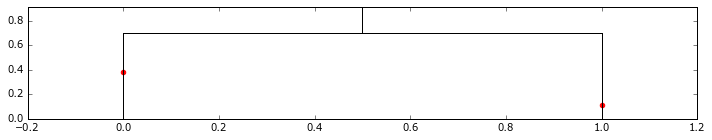

Число мутаций: 2
Мутации:
0.4376 (10)
0.8579 (01)


In [3]:
np.random.seed(0)
K = 2
m = 3
c = [0]
f = [1]
MS_model(K, m, c, f)

Дерево коалесценций с мутациями  
Число индивидуумов K = 2  
Частота мутации m = 4  
Размер популяции равен 1

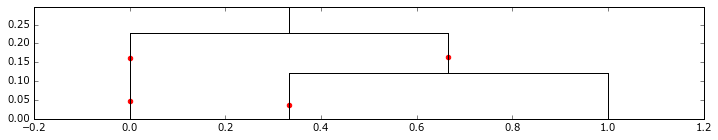

Число мутаций: 4
Мутации:
0.3879 (100)
0.8781 (100)
0.4572 (011)
0.3023 (010)


In [4]:
np.random.seed(1)
K = 3
m = 4
c = [0]
f = [1]
MS_model(K, m, c, f)

Дерево коалесценций с мутациями  
Число индивидуумов K = 3  
Частота мутации m = 5  
Размер популяции равен 3, 0.1, 1.5, 3 и меняется в моменты времени 0, 0.05, 0.65, 6

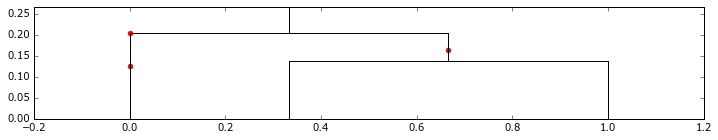

Число мутаций: 3
Мутации:
0.8165 (100)
0.8183 (100)
0.5554 (011)


In [5]:
np.random.seed(8)
K = 3
m = 5
c = [0, 0.05, 0.65, 6]
f = [3, 0.1, 1.5, 3]
MS_model(K, m, c, f)

Частотное распределение времен конечной коалесценции  
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000
Размер популяции равен 1

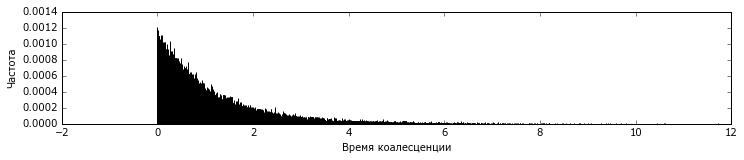

Выборочное среднее 1.00047656041
Выборочное среднеквадратичное отклонение 1.00179226651


In [6]:
np.random.seed(3)
K = 2
m = 0
M = 100000
c = [0]
f = [1]
print_dist_MS(K, m, M, c, f)

Частотное распределение времен конечной коалесценции для Hudson's MS  
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 1

Выборочное среднее 1.00260148
Выборочное среднеквадратичное отклонение 1.00011663652


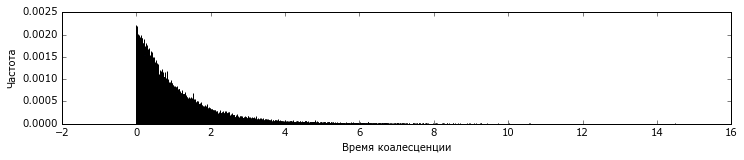

In [7]:
f = open(r'C:\Users\Андрей\Desktop\ms2.txt','r')
S = []
for line in f:
    j = line.find('(')
    if j != -1:
        S.append(2*float(line[j+3:j+8]))
print_Hudson_MS(S)

Частотное распределение времен конечной коалесценции   
Число индивидуумов K = 3  
Частота мутации m = 0 (без мутаций)    
Число хромосом M = 100000  
Размер популяции равен 1

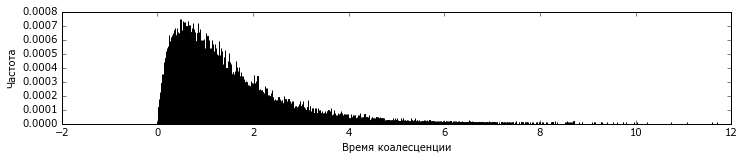

Выборочное среднее 1.33771946856
Выборочное среднеквадратичное отклонение 1.05626514903


In [8]:
np.random.seed(4)
K = 3
m = 0
M = 100000
c = [0]
f = [1]
print_dist_MS(K, m, M, c, f)

Частотное распределение времен конечной коалесценции Hudson's ms  
Число индивидуумов K = 3  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 1

Выборочное среднее 1.33624664
Выборочное среднеквадратичное отклонение 1.05921434275


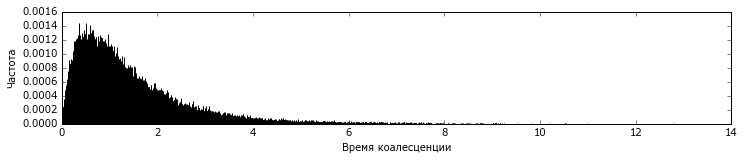

In [9]:
f = open(r'C:\Users\Андрей\Desktop\ms3.txt','r')
S = []
for line in f:
    j = line.find('(')
    if j != -1:
        S.append(2*float(line[j+3:j+8]))
print_Hudson_MS(S)

Частотное распределение времен конечной коалесценции   
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 1.5, 3 и меняется в моменты времени 0, 6

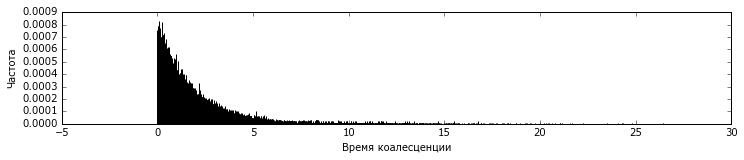

Выборочное среднее 1.5299535619
Выборочное среднеквадратичное отклонение 1.65570020752


In [11]:
np.random.seed(5)
K = 2
m = 0
M = 100000
c = np.array([0,6])
f = np.array([1.5, 3])
print_dist_MS(K, m, M, c, f)

Частотное распределение времен конечной коалесценции  Hudson's ms
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 1.5, 3 и меняется в моменты времени 0, 6

Выборочное среднее 1.52535666
Выборочное среднеквадратичное отклонение 1.65318753781


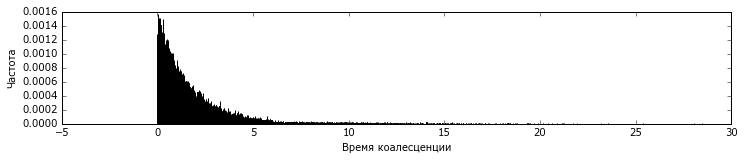

In [12]:
f = open(r'C:\Users\Андрей\Desktop\ms4.txt','r')
S = []
for line in f:
    j = line.find('(')
    if j != -1:
        S.append(2*float(line[j+3:j+8]))
print_Hudson_MS(S)

Частотное распределение времен конечной коалесценции   
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 0, 0.05, 0.65, 6 и меняется в моменты времени 3, 0.1, 1.5, 3

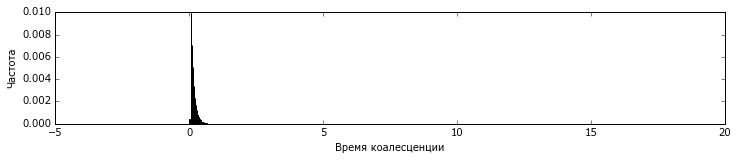

Выборочное среднее 0.15099234732
Выборочное среднеквадратичное отклонение 0.164543145372


In [13]:
np.random.seed(6)
K = 2
m = 0
M = 100000 
c = np.array([0, 0.05, 0.65, 6])
f = np.array([3, 0.1, 1.5, 3])
print_dist_MS(K, m, M, c, f)

Частотное распределение времен конечной коалесценции Hudson's ms
Число индивидуумов K = 2  
Частота мутации m = 0 (без мутаций)  
Число хромосом M = 100000  
Размер популяции равен 0, 0.05, 0.65, 6 и меняется в моменты времени 3, 0.1, 1.5, 3

Выборочное среднее 0.15091558
Выборочное среднеквадратичное отклонение 0.15547290192


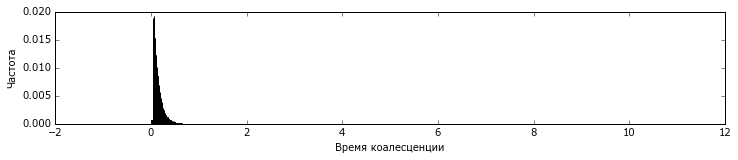

In [14]:
f = open(r'C:\Users\Андрей\Desktop\ms5.txt','r')
S = []
for line in f:
    j = line.find('(')
    if j != -1:
        S.append(2*float(line[j+3:j+8]))
print_Hudson_MS(S)

Зависимость числа мутаций от длины ребра  
Число индивидуумов K = 100  
Частота мутации m = 10000  
Число мутаций порядка 100000  
Размер популяции равен 1 

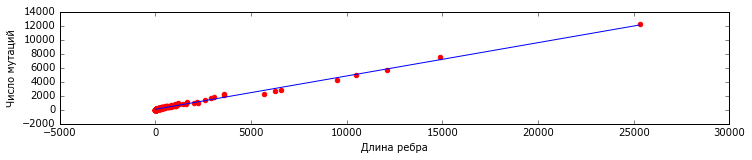

Всего мутаций: 91300


In [15]:
np.random.seed(6)
K = 100
m = 10000
c = [0]
f = [1]
MS_model_t_dist(K, m, c, f)